The dataset used in this notebook was sourced from the following URL on Kaggle: https://www.kaggle.com/datasets/uciml/autompg-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
#Show max 100 columns or rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#Dont use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)

Please note that the dataseet used in this notebook was obtained from the following URL: https://www.kaggle.com/datasets/uciml/autompg-dataset

In [2]:
#Load in the CSV
df = pd.read_csv("./auto-mpg-dataset/auto-mpg.csv")

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.00000,8,307.00000,130,3504,12.00000,70,1,chevrolet chevelle malibu
1,15.00000,8,350.00000,165,3693,11.50000,70,1,buick skylark 320
2,18.00000,8,318.00000,150,3436,11.00000,70,1,plymouth satellite
3,16.00000,8,304.00000,150,3433,12.00000,70,1,amc rebel sst
4,17.00000,8,302.00000,140,3449,10.50000,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.00000,4,140.00000,86,2790,15.60000,82,1,ford mustang gl
394,44.00000,4,97.00000,52,2130,24.60000,82,2,vw pickup
395,32.00000,4,135.00000,84,2295,11.60000,82,1,dodge rampage
396,28.00000,4,120.00000,79,2625,18.60000,82,1,ford ranger


For this analysis, I used the 'mpg' (miles per gallon), 'weight' and 'model year' values from the data. These two factors will be utilised to assess their connection and maybe build a model that can estimate miles per gallon depending on a car's weight and model year.

# Means, ranges and distributions

In [4]:
# The explanation for the .describe() method was found at the following URL: 
# https://www.sharpsightlabs.com/blog/pandas-describe/

df[['mpg', 'weight', 'model year']].describe()

,mpg,weight,model year
count,398.00000,398.00000,398.00000
mean,23.51457,2970.42462,76.01005
std,7.81598,846.84177,3.69763
min,9.00000,1613.00000,70.00000
25%,17.50000,2223.75000,73.00000
50%,23.00000,2803.50000,76.00000
75%,29.00000,3608.00000,79.00000
max,46.60000,5140.00000,82.00000


These numbers are the statistics for the two columns "mpg" and "weight" in the supplied dataframe.

- means for mpg, weight and model year are 23.51457, 2970.42462 and 76.01005 respectively
- medians for mpg, weight and model year are 23, 2803.50000 and 76.00000 respectively

In [5]:
range = df['mpg'].max() - df['mpg'].min()
print("MPG range:", range)

MPG range: 37.6


In [6]:
range = df['weight'].max() - df['weight'].min()
print("Weight range:", range)

Weight range: 3527


In [7]:
range = df['model year'].max() - df['model year'].min()
print("Model year range:", range)

Model year range: 12


In [8]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [9]:
cars = df['cylinders']
n_cars = cars.size
_8_cylinders = cars[cars == 8].size
_6_cylinders = cars[cars == 6].size
_5_cylinders = cars[cars == 5].size
_4_cylinders = cars[cars == 4].size
_3_cylinders = cars[cars == 3].size
probabilities = [_8_cylinders/n_cars, _6_cylinders/n_cars, _5_cylinders/n_cars, _4_cylinders/n_cars, _3_cylinders/n_cars]

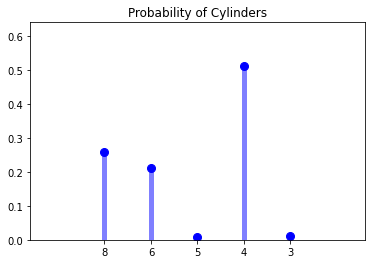

In [16]:

x_tick_labels = ['8','6','5','4','3']
fig, ax = plt.subplots(1, 1)
ax.plot([0,1,2,3,4], probabilities, 'bo', ms=8 )
ax.vlines([0,1,2,3,4], [0]*5, probabilities, colors='b', lw=5, alpha=0.5)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(x_tick_labels)
ax.set_ylim(ymin=0, ymax=max(probabilities)*1.25)
ax.set_title('Probability of Cylinders')
plt.margins(0.4)
plt.show()

# Plotting mpg against weight values

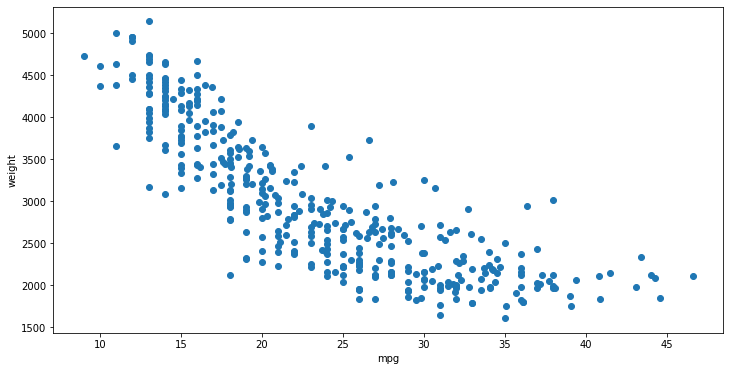

In [17]:
import matplotlib.pyplot as plt
import numpy as np

data = df[["mpg","weight"]].values

x = data[:,0]
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    return ax

ax = plot_scatter(x,y,"mpg","weight")

# Pearson correlation coefficient for mpg against weight values

In [18]:
#Correlate
r, p = stats.pearsonr(x,y)
r

-0.831740933244335

(Answer partly explained by ChatGPT)

A Pearson correlation coefficient of -0.831740933244335 indicates a strong negative correlation between "mpg" and "weight." This confirms the finding that there seems to be a relationship between the two variables, where the higher the weight, the lower the "mpg" value.

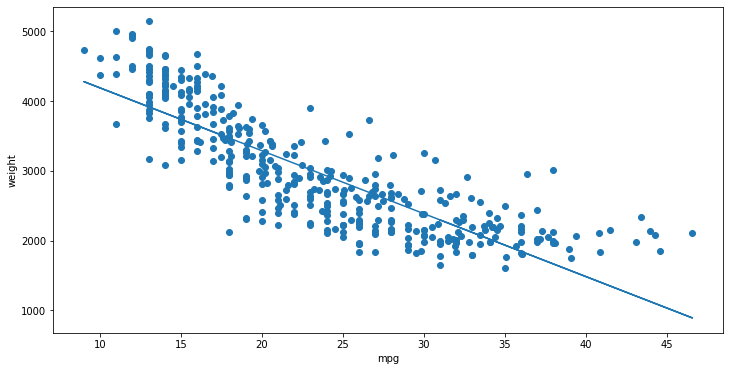

In [19]:
data = df[["mpg","weight"]].values
x = data[:,0]
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"mpg","weight")
ax.plot(x, model_y)


The slope and intercept of the line of best fit that describes the connection between "mpg" and "weight" are calculated using linear regression analysis. The slope denotes the rate of change of "mpg" in relation to "weight," and the intercept is the predicted "mpg" when "weight" is 0. The line of best fit is put on top of the data point scatter plot to provide a visual representation of the relationship between the two variables. The negative slope implies that "weight" and "mpg" have a negative association, which means that as "weight" grows, "mpg" declines. This makes sense because bigger vehicles have worse fuel efficiency.

In [20]:
slope, intercept

(-90.11699, 5089.487113013489)


The slope of the regression line is -90.11699 and the y-intercept is 5089.487113013489. In this scenario, a unit increase in weight is related with a -90.11699 unit loss in mpg. The y-intercept is the response value when the predictor is zero. In this situation, the predicted mpg number is 5089.487113013489 when the weight is zero.

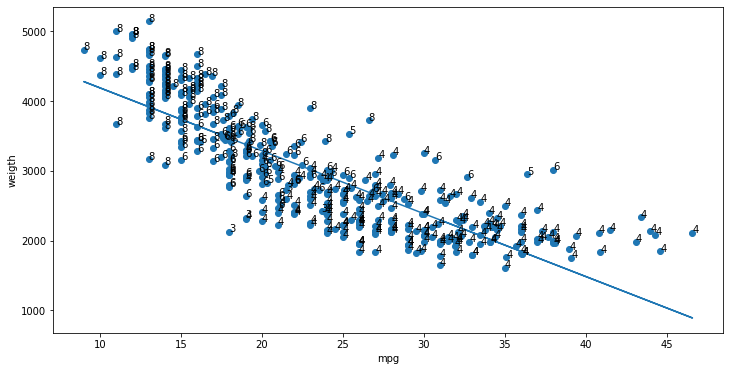

In [21]:
def plot_scatter(x,y,xlabel,ylabel,annotate=True):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    if annotate:
        annotations = df["cylinders"].values
        for i, label in enumerate(annotations):
            ax.annotate(label, (x[i], y[i]))
    return ax

ax = plot_scatter(x,y,"mpg","weigth")
ax.plot(x, model_y)

The new figure depicts the scatter plot between the variables "mpg" and "weight," along with the line of best fit (which was obtained from the linear regression analysis). The number of cylinders is shown by the annotations on each data point. What can be observed is that a larger number of cylinders is related with heavier weight, which is connected with lower "mpg" numbers. The graphic clearly illustrates that as the number of cylinders grows, so does the weight of the automobile, and hence the "mpg" numbers.

# Plotting model year against weight values

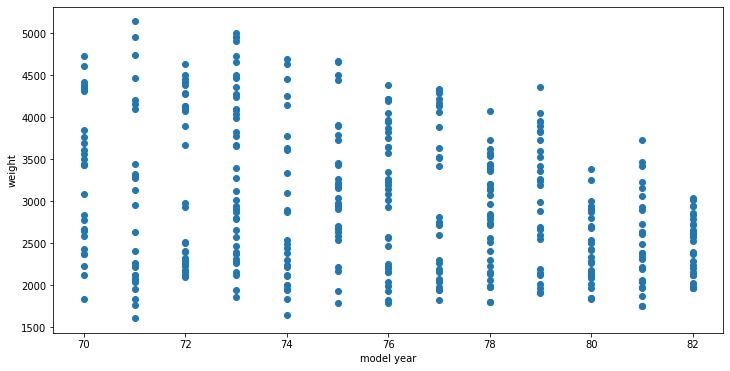

In [23]:
data = df[["model year","weight"]].values

x = data[:,0]
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    return ax

ax = plot_scatter(x,y,"model year","weight")

# Pearson correlation coefficient for model year against weight values

In [24]:
r, p = stats.pearsonr(x,y)
r

-0.3065643342832898


The Pearson correlation coefficient of -0.3065643342832898 reveals a slight inverse relationship between "model year" and "weight." This suggests that there does not appear to be a significant association between the two variables, with the lower the weight indicating a greater "model year" value.

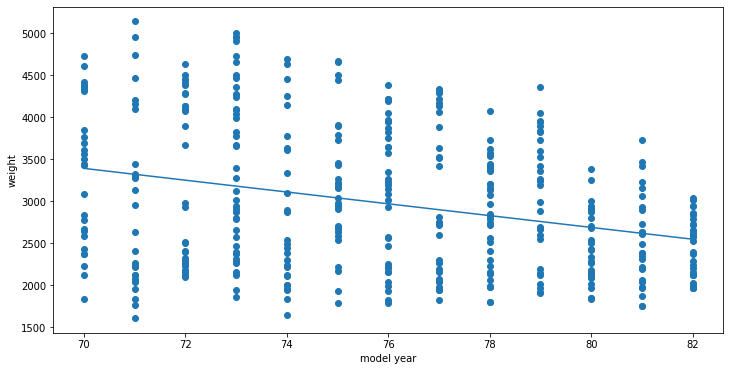

In [25]:
data = df[["model year","weight"]].values
x = data[:,0]
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"model year","weight")
ax.plot(x, model_y)

In [26]:
slope, intercept

(-70.210304, 8307.113230953813)


The slope of the regression line for this plot is -70.210304 and the y-intercept is 8307.113230953813. In this scenario, a unit increase in weight is related with a -70.210304 unit loss in model year. The y-intercept is the response value when the predictor is zero. In this situation, the predicted model year number is 8307.113230953813 when the weight is zero.

# Plotting model year against mpg values

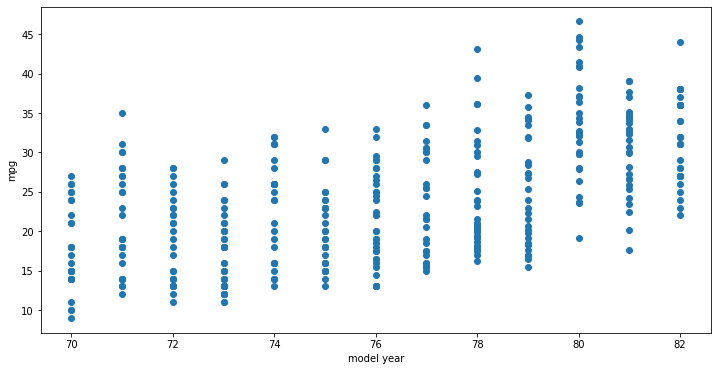

In [28]:
data = df[["model year","mpg"]].values

x = data[:,0]
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    return ax

ax = plot_scatter(x,y,"model year","mpg")

# Pearson correlation coefficient for model year against mpg values

In [29]:
r, p = stats.pearsonr(x,y)
r

0.5792671330833096


The Pearson correlation coefficient of 0.5792671330833096 reveals a slightly above average relationship between "model year" and "mpg." This suggests that there appear to be a positive correlation between the two variables, with the higher the mpg indicating a greater "model year" value.

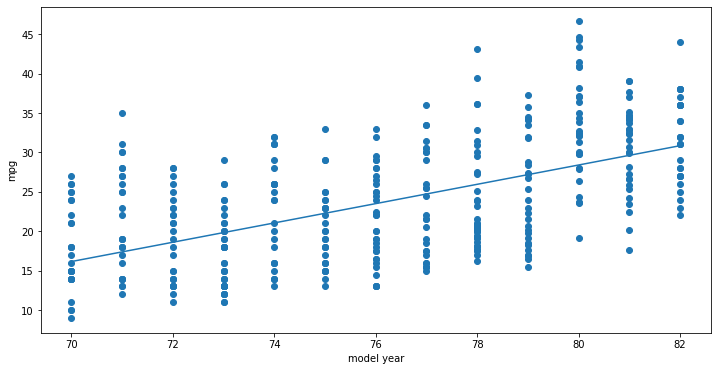

In [30]:
data = df[["model year","mpg"]].values
x = data[:,0]
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"model year","mpg")
ax.plot(x, model_y)

In [31]:
slope, intercept

(1.2244456, -69.55560174195766)

(Answer partly explained by ChatGPT)

For this plot, the slope of the regression line is 1.2244456, and the y-intercept is -69.55560174195766. A unit increase in mpg corresponds to a 1.2244456 unit gain in model year in this scenario. When the predictor is zero, the y-intercept is the response value. When the mpg is zero, the anticipated model year number is -69.55560174195766.

# Multiple regression

In [33]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
car_df = pd.read_csv("/home/dm/Documents/UAL-CCI/homework/Intro_DS/auto-mpg-dataset/auto-mpg.csv") 
x = car_df[['mpg','weight']]
y = car_df['model year'] 
regr = linear_model.LinearRegression()
regr.fit(x, y) 
print(regr.coef_, regr.intercept_,regr.score(x, y))

[0.49776431 0.00248257] 56.93105294819644 0.43518345579313844


The resulting coeffients and intercept show us that from a starting point of model year 57
- for every 1 mpg we expect a further 0.0025 of model year
- for every 1 unit of weight we expect a further 0.50 of model year

# Conclusion

Potential ethical issues that may arise from using these models to make predictions (answer partly provided by ChatGPT):

- Concerns regarding privacy: Collecting personal data about car owners, such as driving behaviour, and demographics, might generate privacy concerns.

- Data Misuse: The information gathered might be used for purposes other than those intended, such as targeted advertising.

- Inaccurate Data: If fuel consumptions are not correctly reported, the accuracy of data obtained might be affected.

- Bias: The study's selection of cars might be skewed, resulting in erroneous findings regarding the total fuel economy of cars.

- Environmental impact: If the study results in a focus on improving fuel efficiency at the expense of other important matters such as emissions reduction or renewable energy use, it might have a negative environmental impact.

In this scenario, some potential factors that might assist in enhancing the models might include (answer partly provided by ChatGPT):

- Engine displacement
- Engine size
- Horsepower
- Number of cylinders
- Acceleration
- Tire size and pressure